In [16]:
# To predict hand written number

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import  warnings
warnings.filterwarnings(action='ignore')

# Reading File

In [2]:
df=pd.read_csv('train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41608,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
len(df)

42000

In [10]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [11]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [12]:
df.nunique()

label       10
pixel0       1
pixel1       1
pixel2       1
pixel3       1
            ..
pixel779     3
pixel780     1
pixel781     1
pixel782     1
pixel783     1
Length: 785, dtype: int64

In [13]:
df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [14]:
df.shape

(42000, 785)

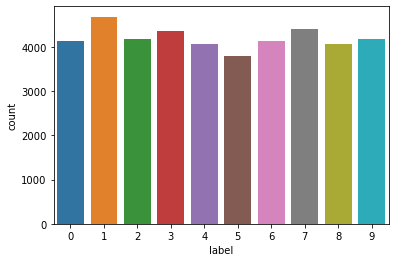

In [15]:
_=sns.countplot(df['label'])

# Split into x and y

In [16]:
x =df.drop(['label'],axis=1)
y = df['label']

In [17]:
len(x.columns)

784

In [18]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [19]:
# convert into numpy array
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [20]:
type(x)

numpy.ndarray

In [21]:
type(y)

numpy.ndarray

In [22]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
print(y)

[1 0 1 ... 7 6 9]


In [24]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
x[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [26]:
x[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  18,  30, 137, 137, 192,  86,  72,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  13,  86, 250, 254, 254, 254, 254, 217,
       246, 151,  32,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  16, 179, 254, 254, 254, 25

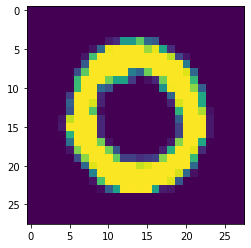

In [27]:
plt.imshow(x[1].reshape(28,28))

The label of the image is 1


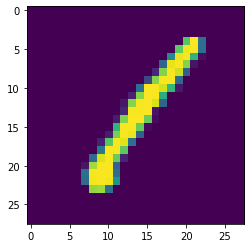

The label of the image is 0


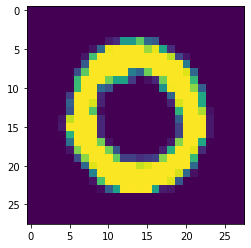

The label of the image is 1


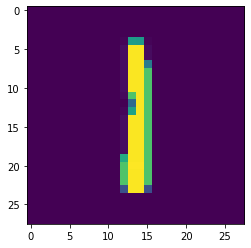

The label of the image is 4


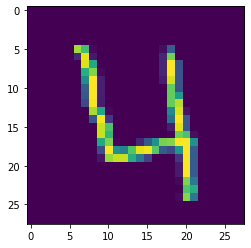

The label of the image is 0


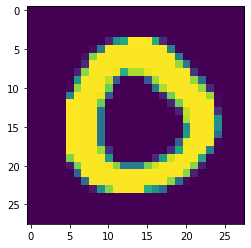

In [28]:
for i in range(5):
    plt.imshow(x[i].reshape(28,28))
    print('The label of the image is',y[i])
    plt.show()


# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Scaling

In [30]:
x_train=x_train/255
x_test=x_test/255

In [31]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Creating ANN

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [34]:
ann_clf=Sequential()

In [35]:
ann_clf.add(Dense(activation='relu',input_dim=784,units=128,kernel_initializer='uniform'))

In [36]:
ann_clf.add(Dense(activation='softmax',units=10,kernel_initializer='uniform'))

In [37]:
ann_clf.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
ann_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [39]:
history=ann_clf.fit(x_train,y_train,validation_split=0.33,batch_size=32,epochs=20)

Epoch 1/20
704/704 [==============================] - 8s 7ms/step - loss: 0.4526 - accuracy: 0.8790 - val_loss: 0.2659 - val_accuracy: 0.9261
Epoch 2/20
704/704 [==============================] - 5s 7ms/step - loss: 0.2181 - accuracy: 0.9355 - val_loss: 0.2020 - val_accuracy: 0.9415
Epoch 3/20
704/704 [==============================] - 5s 7ms/step - loss: 0.1587 - accuracy: 0.9530 - val_loss: 0.1600 - val_accuracy: 0.9527
Epoch 4/20
704/704 [==============================] - 5s 7ms/step - loss: 0.1199 - accuracy: 0.9651 - val_loss: 0.1494 - val_accuracy: 0.9560
Epoch 5/20
704/704 [==============================] - 5s 7ms/step - loss: 0.0950 - accuracy: 0.9731 - val_loss: 0.1360 - val_accuracy: 0.9619
Epoch 6/20
704/704 [==============================] - 5s 7ms/step - loss: 0.0744 - accuracy: 0.9784 - val_loss: 0.1247 - val_accuracy: 0.9623
Epoch 7/20
704/704 [==============================] - 5s 7ms/step - loss: 0.0608 - accuracy: 0.9819 - val_loss: 0.1247 - val_accuracy: 0.9622
Epoch 

In [40]:
y_pred=ann_clf.predict(x_test)

263/263 [==============================] - 2s 3ms/step


In [42]:
y_pred

array([[4.2592823e-08, 4.1077243e-07, 5.8370596e-04, ..., 1.5995663e-06,
        9.9941313e-01, 8.6195755e-08],
       [3.1334224e-10, 9.9805355e-01, 4.1164404e-07, ..., 1.9120631e-03,
        3.3279950e-05, 2.5024672e-08],
       [2.4327333e-12, 1.4328776e-11, 2.9558523e-14, ..., 5.1262268e-05,
        5.2279447e-09, 9.9994719e-01],
       ...,
       [1.4921546e-18, 1.4440569e-11, 2.8694284e-12, ..., 1.7137569e-16,
        5.2178888e-13, 1.2597925e-12],
       [1.0000000e+00, 1.0499742e-18, 3.9198944e-10, ..., 2.9184845e-14,
        1.7240889e-11, 1.7273469e-12],
       [3.9200614e-14, 7.4012341e-15, 6.8973512e-12, ..., 1.5589139e-06,
        1.6046200e-09, 9.9997973e-01]], dtype=float32)

In [43]:
y_pred[0]

array([4.2592823e-08, 4.1077243e-07, 5.8370596e-04, 7.0622934e-07,
       3.3311844e-07, 3.2328440e-13, 7.9902494e-09, 1.5995663e-06,
       9.9941313e-01, 8.6195755e-08], dtype=float32)

In [44]:
np.argmax(y_pred[0])

8

In [48]:
new_y_pred=y_pred.argmax(axis=1)
new_y_pred

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
acc=accuracy_score(y_test,new_y_pred)
acc

0.9648809523809524

In [55]:
con=confusion_matrix(y_test,new_y_pred)
con

array([[798,   0,   2,   1,   2,   3,   7,   1,   0,   2],
       [  0, 896,   2,   0,   1,   0,   2,   3,   4,   1],
       [  0,   5, 812,   3,  10,   0,   3,   7,   5,   1],
       [  0,   3,   6, 893,   0,  13,   0,  11,   5,   6],
       [  1,   0,   2,   0, 817,   1,   7,   3,   1,   7],
       [  0,   1,   0,   8,   3, 676,   6,   2,   2,   4],
       [  4,   1,   0,   0,   2,   3, 773,   0,   2,   0],
       [  0,   0,   6,   1,   8,   4,   0, 865,   2,   7],
       [  1,   5,  11,   9,   7,   7,   3,   8, 779,   5],
       [  1,   1,   1,   5,  16,   5,   0,  10,   3, 796]], dtype=int64)

In [57]:
clas=classification_report(new_y_pred,y_test)
clas

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98       805\n           1       0.99      0.98      0.98       912\n           2       0.96      0.96      0.96       842\n           3       0.95      0.97      0.96       920\n           4       0.97      0.94      0.96       866\n           5       0.96      0.95      0.96       712\n           6       0.98      0.97      0.97       801\n           7       0.97      0.95      0.96       910\n           8       0.93      0.97      0.95       803\n           9       0.95      0.96      0.96       829\n\n    accuracy                           0.96      8400\n   macro avg       0.96      0.96      0.96      8400\nweighted avg       0.97      0.96      0.96      8400\n'

# Plot Train loss VS Test loss


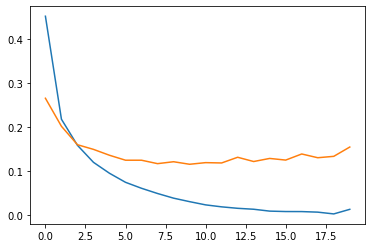

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Plot Train accuracy VS Test accuracy

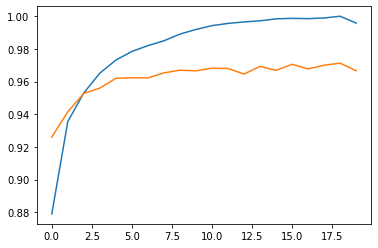

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [74]:
x[3]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 220, 179,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   9,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  28, 247,  17,   0,   0,   0,   

In [72]:
y[3]

4

In [75]:
y_pr=ann_clf.predict([[0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 220, 179,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   9,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  28, 247,  17,   0,   0,   0,   0,   0,
         0,   0,   0,  27, 202,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 242, 155,   0,   0,   0,
         0,   0,   0,   0,   0,  27, 254,  63,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 160, 207,   6,
         0,   0,   0,   0,   0,   0,   0,  27, 254,  65,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 127,
       254,  21,   0,   0,   0,   0,   0,   0,   0,  20, 239,  65,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  77, 254,  21,   0,   0,   0,   0,   0,   0,   0,   0, 195,
        65,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  70, 254,  21,   0,   0,   0,   0,   0,   0,   0,
         0, 195, 142,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  56, 251,  21,   0,   0,   0,   0,   0,
         0,   0,   0, 195, 227,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 222, 153,   5,   0,   0,
         0,   0,   0,   0,   0, 120, 240,  13,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  67, 251,  40,
         0,   0,   0,   0,   0,   0,   0,  94, 255,  69,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       234, 184,   0,   0,   0,   0,   0,   0,   0,  19, 245,  69,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 234, 169,   0,   0,   0,   0,   0,   0,   0,   3, 199,
       182,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 154, 205,   4,   0,   0,  26,  72, 128, 203,
       208, 254, 254, 131,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  61, 254, 129, 113, 186, 245, 251,
       189,  75,  56, 136, 254,  73,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  15, 216, 233, 233, 159,
       104,  52,   0,   0,   0,  38, 254,  73,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  18, 254,  73,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 254,  73,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 206,
       106,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 186, 159,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   6, 209, 101,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0
        
        ]])

1/1 [==============================] - 0s 45ms/step


In [76]:
y_pr

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

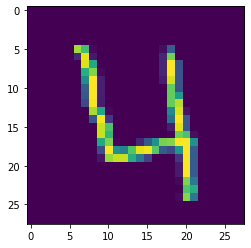

In [80]:
plt.imshow(x[3].reshape(28,28))

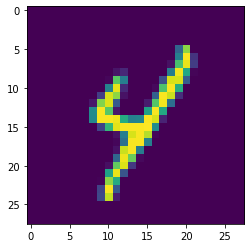

In [83]:
plt.imshow(x_test[50].reshape(28,28))

In [86]:
ann_clf.predict(x_test[50].reshape(1,784)).argmax(axis=1)

1/1 [==============================] - 0s 41ms/step


array([4], dtype=int64)